In [37]:
import numpy as np   
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df= pd.read_excel("Election_Data.xlsx",sheet_name= 'Election_Dataset_Two Classes')

In [39]:
df.head(10)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
5,6,Labour,47,3,4,4,4,4,2,male
6,7,Labour,57,2,2,4,4,11,2,male
7,8,Labour,77,3,4,4,1,1,0,male
8,9,Labour,39,3,3,4,4,11,0,female
9,10,Labour,70,3,2,5,1,11,2,male


In [40]:
df.tail(10)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1515,1516,Conservative,82,2,2,2,1,11,2,female
1516,1517,Labour,30,3,4,4,2,4,2,male
1517,1518,Labour,76,4,3,2,2,11,2,male
1518,1519,Labour,50,3,4,4,2,5,2,male
1519,1520,Conservative,35,3,4,4,2,8,2,male
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [41]:
df.shape

(1525, 10)

In [42]:
df.dtypes

Unnamed: 0                  int64
vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [44]:
df.describe()

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,763.000000,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,440.373894,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,382.000000,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,763.000000,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,1144.000000,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,1525.000000,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [45]:
df.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [46]:
df.skew()

C:\Users\user\AppData\Local\Temp\ipykernel_7984\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Unnamed: 0                 0.000000
age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

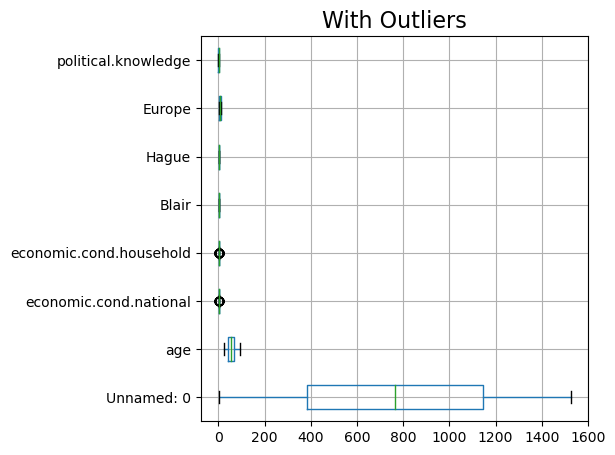

In [47]:
cont=df.dtypes[(df.dtypes!='object')].index
plt.figure(figsize=(5,5))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

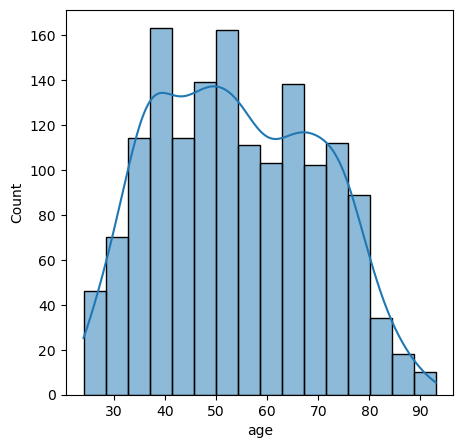

In [48]:
plt.figure(figsize=(5,5))
sns.histplot(df['age'], kde=True)

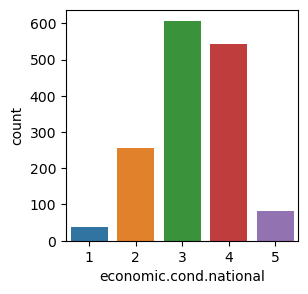

3    39.803279
4    35.540984
2    16.852459
5     5.377049
1     2.426230
Name: economic.cond.national, dtype: float64

In [49]:
plt.figure(figsize=(3,3))
sns.countplot(data=df, x='economic.cond.national')
plt.show()
df['economic.cond.national'].value_counts(normalize=True)*100

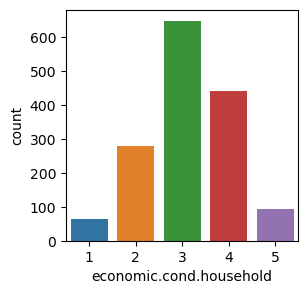

3    42.491803
4    28.852459
2    18.360656
5     6.032787
1     4.262295
Name: economic.cond.household, dtype: float64

In [50]:
plt.figure(figsize=(3,3))
sns.countplot(data=df, x='economic.cond.household')
plt.show()
df['economic.cond.household'].value_counts(normalize=True)*100

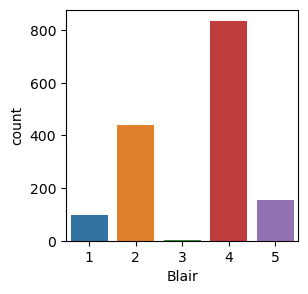

4    54.819672
2    28.721311
5    10.032787
1     6.360656
3     0.065574
Name: Blair, dtype: float64

In [51]:
plt.figure(figsize=(3,3))
sns.countplot(data=df, x='Blair')
plt.show()
df['Blair'].value_counts(normalize=True)*100

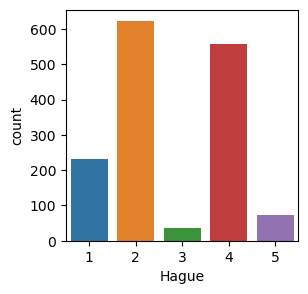

2    40.918033
4    36.590164
1    15.278689
5     4.786885
3     2.426230
Name: Hague, dtype: float64

In [52]:
plt.figure(figsize=(3,3))
sns.countplot(data=df, x='Hague')
plt.show()
df['Hague'].value_counts(normalize=True)*100

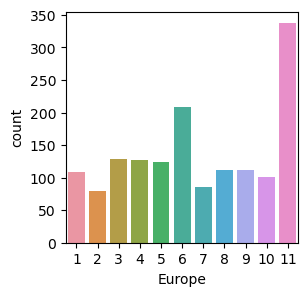

11    22.163934
6     13.704918
3      8.459016
4      8.327869
5      8.131148
8      7.344262
9      7.278689
1      7.147541
10     6.622951
7      5.639344
2      5.180328
Name: Europe, dtype: float64

In [53]:
plt.figure(figsize=(3,3))
sns.countplot(data=df, x='Europe')
plt.show()
df['Europe'].value_counts(normalize=True)*100

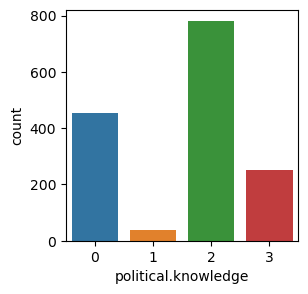

2    51.278689
0    29.836066
3    16.393443
1     2.491803
Name: political.knowledge, dtype: float64

In [54]:
plt.figure(figsize=(3,3))
sns.countplot(data=df, x='political.knowledge')
plt.show()
df['political.knowledge'].value_counts(normalize=True)*100

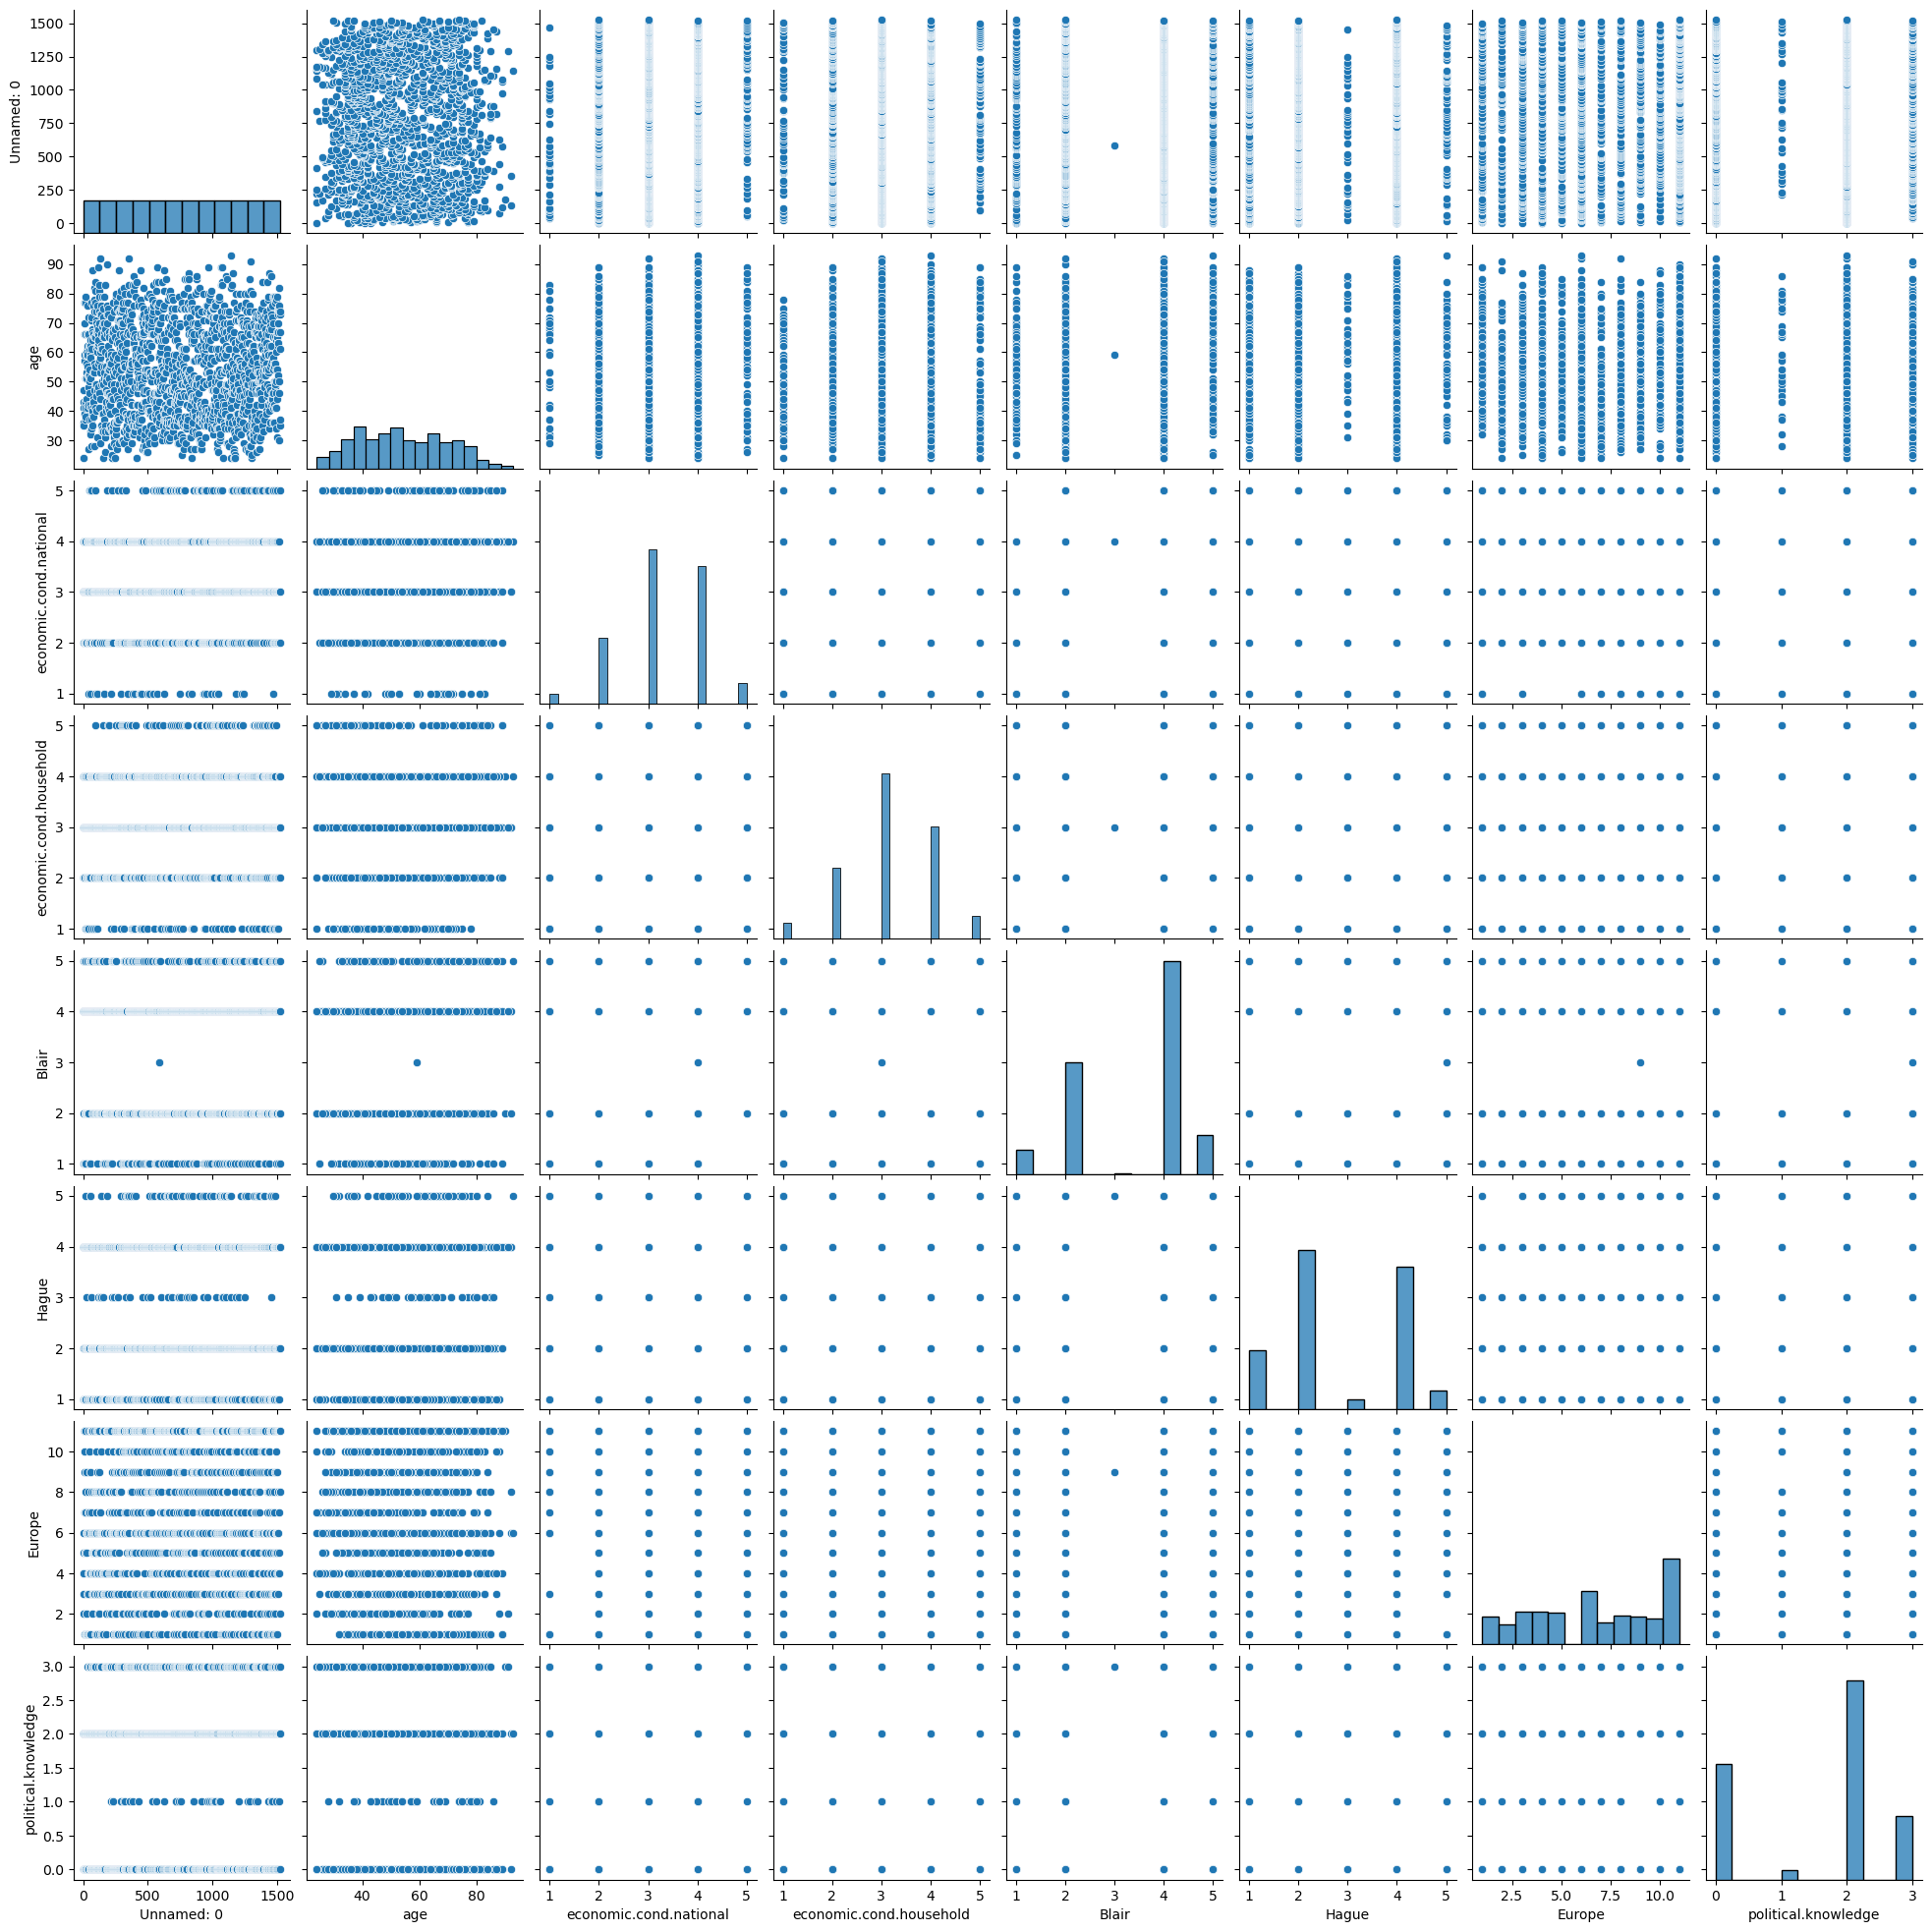

In [55]:
sns.pairplot(df)
plt.show()

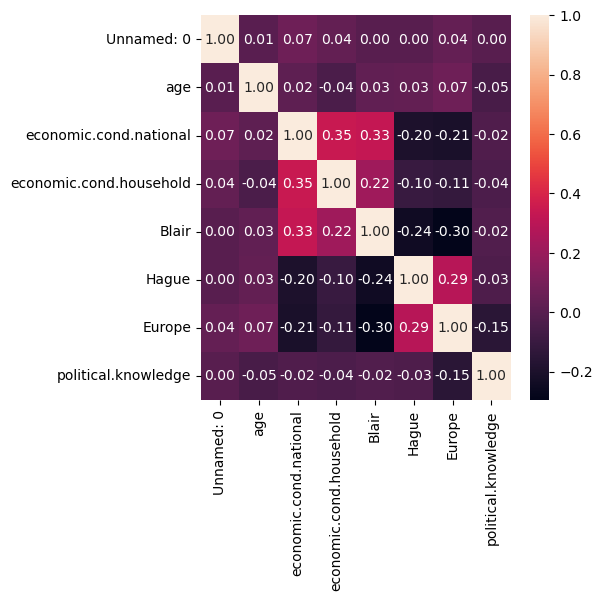

In [56]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True,fmt=".2f");

In [57]:
df.drop("Unnamed: 0",axis=1,inplace =True)

In [58]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [59]:
df['vote'].value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [60]:
df['gender'].value_counts()

female    812
male      713
Name: gender, dtype: int64

In [61]:
columns=['gender', 'vote']

In [62]:
df=pd.get_dummies(df, columns=columns,drop_first=True)

In [63]:
df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male,vote_Labour
0,43,3,3,4,1,2,2,0,1
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,0,1
4,41,2,2,1,1,6,2,1,1


In [64]:
df['vote_Labour'].value_counts()

1    1063
0     462
Name: vote_Labour, dtype: int64

In [65]:
df['gender_male'].value_counts()

0    812
1    713
Name: gender_male, dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      1525 non-null   int64
 1   economic.cond.national   1525 non-null   int64
 2   economic.cond.household  1525 non-null   int64
 3   Blair                    1525 non-null   int64
 4   Hague                    1525 non-null   int64
 5   Europe                   1525 non-null   int64
 6   political.knowledge      1525 non-null   int64
 7   gender_male              1525 non-null   uint8
 8   vote_Labour              1525 non-null   uint8
dtypes: int64(7), uint8(2)
memory usage: 86.5 KB


In [67]:
df.duplicated().sum()

8

In [68]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 8


,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male,vote_Labour
67,35,4,4,5,2,3,2,1,1
626,39,3,4,4,2,5,2,1,1
870,38,2,4,2,2,4,3,1,1
983,74,4,3,2,4,8,2,0,0
1154,53,3,4,2,2,6,0,0,0
1236,36,3,3,2,2,6,2,0,1
1244,29,4,4,4,2,2,2,0,1
1438,40,4,3,4,2,2,2,1,1


In [69]:
df=df.drop_duplicates()

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      1517 non-null   int64
 1   economic.cond.national   1517 non-null   int64
 2   economic.cond.household  1517 non-null   int64
 3   Blair                    1517 non-null   int64
 4   Hague                    1517 non-null   int64
 5   Europe                   1517 non-null   int64
 6   political.knowledge      1517 non-null   int64
 7   gender_male              1517 non-null   uint8
 8   vote_Labour              1517 non-null   uint8
dtypes: int64(7), uint8(2)
memory usage: 97.8 KB


In [71]:
df.shape

(1517, 9)

## Logistic regression

In [72]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [73]:
X = df.drop('vote_Labour', axis=1)
y = df['vote_Labour']

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [75]:
from sklearn.linear_model import LogisticRegression
Log_model= LogisticRegression()
Log_model.fit(X_train, y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
## Performance Matrix on train data set
y_train_predict = Log_model.predict(X_train)
model_score = Log_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8341187558906692
[[199 108]
 [ 68 686]]
              precision    recall  f1-score   support

           0       0.75      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [77]:
## Performance Matrix on test data set
y_test_predict = Log_model.predict(X_test)
model_score = Log_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8267543859649122
[[110  43]
 [ 36 267]]
              precision    recall  f1-score   support

           0       0.75      0.72      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



AUC: 0.890


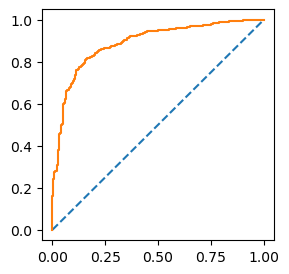

In [78]:
plt.figure(figsize=(3,3))
# predict probabilities
probs = Log_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.890


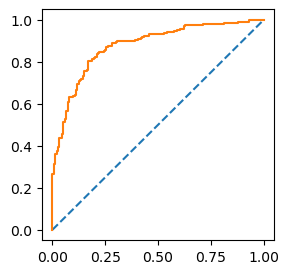

In [79]:
plt.figure(figsize=(3,3))
# predict probabilities
probs = Log_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Linear Discriminant analysis

In [80]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.metrics import accuracy_score

In [81]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X,y)
model

LinearDiscriminantAnalysis()

In [82]:
y_pred = clf.predict(X_test)

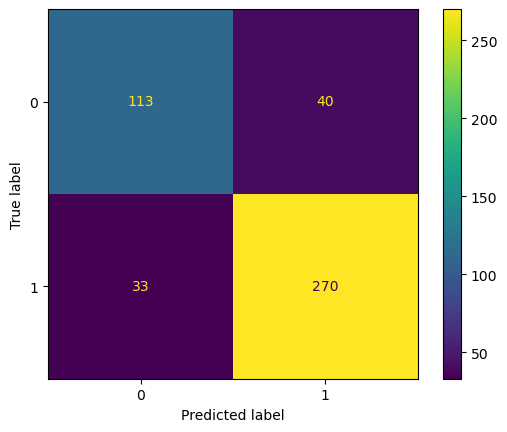

In [83]:
from sklearn.metrics import ConfusionMatrixDisplay,precision_score,recall_score
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [84]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.84


In [85]:
pred_class_train = model.predict(X_train)
pred_class_test = model.predict(X_test)

In [86]:
print(classification_report(y_train, pred_class_train))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.87      0.90      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [87]:
print(classification_report(y_test, pred_class_test))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76       153
           1       0.87      0.89      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.82       456
weighted avg       0.84      0.84      0.84       456



AUC: 0.887


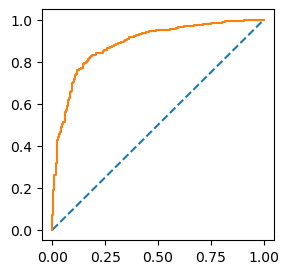

In [88]:
plt.figure(figsize=(3,3))
# predict probabilities
probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.887


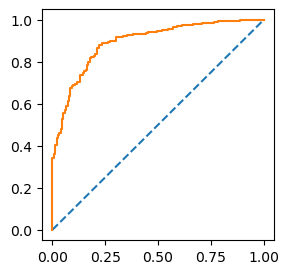

In [89]:
plt.figure(figsize=(3,3))
# predict probabilities
probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Naive Bayes Model

In [90]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [91]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [92]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8350612629594723
[[211  96]
 [ 79 675]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [93]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



AUC: 0.888


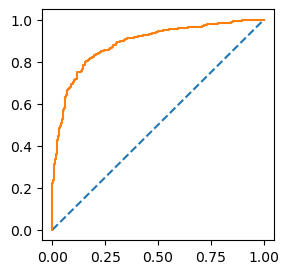

In [94]:
plt.figure(figsize=(3,3))
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.888


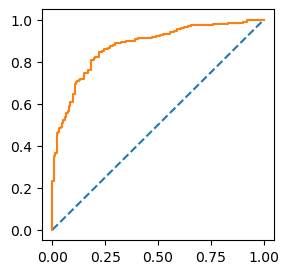

In [95]:
plt.figure(figsize=(3,3))
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## KNN Model

In [96]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [97]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8557964184731386
[[209  98]
 [ 55 699]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       307
           1       0.88      0.93      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.80      0.82      1061
weighted avg       0.85      0.86      0.85      1061



E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

In [98]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

0.8245614035087719
[[101  52]
 [ 28 275]]
              precision    recall  f1-score   support

           0       0.78      0.66      0.72       153
           1       0.84      0.91      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



AUC: 0.924


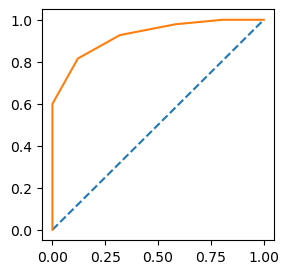

In [99]:
plt.figure(figsize=(3,3))
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.924


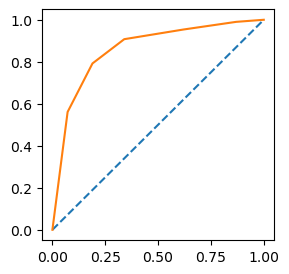

In [100]:
plt.figure(figsize=(3,3))
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Ada Boost

In [101]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [102]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8501413760603205
[[214  93]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [103]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8135964912280702
[[103  50]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



AUC: 0.915


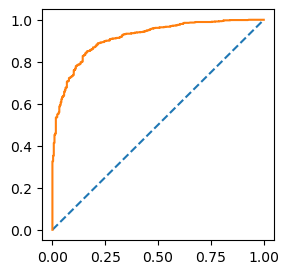

In [104]:
plt.figure(figsize=(3,3))
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.915


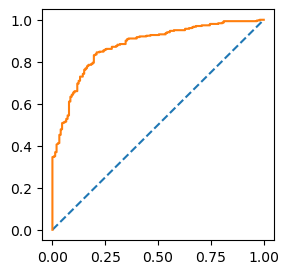

In [105]:
plt.figure(figsize=(3,3))
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Gradient Boosting

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [107]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8925541941564562
[[239  68]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [108]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8355263157894737
[[105  48]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



AUC: 0.951


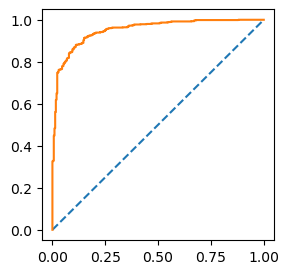

In [109]:
plt.figure(figsize=(3,3))
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.951


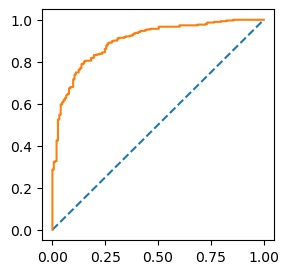

In [110]:
plt.figure(figsize=(3,3))
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [112]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [113]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.831140350877193
[[104  49]
 [ 28 275]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



### Bagging  (Random Forest should be applied for Bagging)

In [114]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [115]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9679547596606974
[[277  30]
 [  4 750]]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       307
           1       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061



In [116]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8289473684210527
[[104  49]
 [ 29 274]]
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



AUC: 0.997


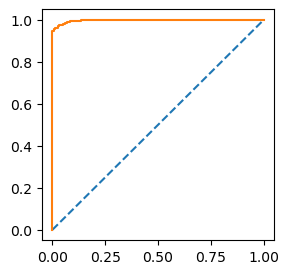

In [117]:
plt.figure(figsize=(3,3))
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.997


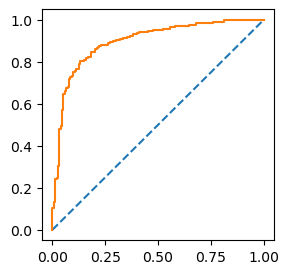

In [118]:
plt.figure(figsize=(3,3))
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Applying GridSearchCV for Bagging (Random Forest should be applied for Bagging)

In [167]:
from sklearn.model_selection import GridSearchCV

In [168]:

# Define the base estimator
base_estimator = DecisionTreeClassifier()

# Define the Bagging Classifier
bagging = BaggingClassifier(base_estimator=base_estimator)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0],
    'base_estimator__max_depth': [2, 4, 6],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(bagging, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'base_estimator__max_depth': 6, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 100}
Best score:  0.8322526353087076


In [169]:
best_model = grid_search.best_estimator_

In [170]:
# Prediction on the training set & test set

ytrain_predict1 = best_model.predict(X_train)
ytest_predict1 = best_model.predict(X_test)

E:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.85      0.78      0.82       307
           1       0.91      0.95      0.93       754

    accuracy                           0.90      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.90      0.90      0.90      1061
 



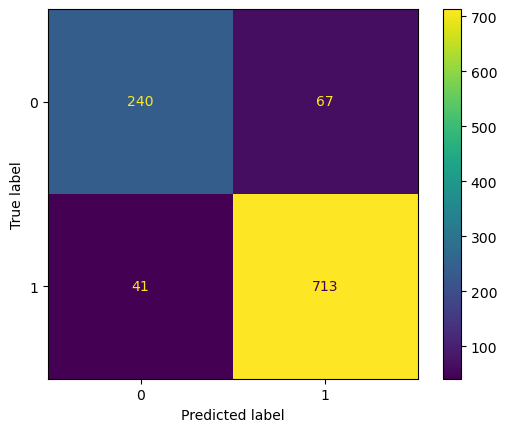

In [171]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict1),'\n');

E:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456
 



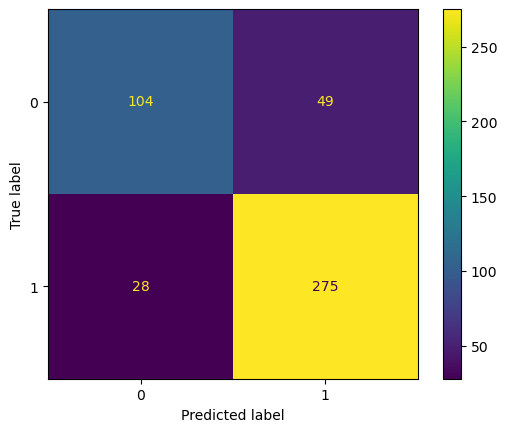

In [172]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict1),'\n');

## Problem 2

In [119]:
import numpy as np 
import pandas as pd 
import re 
import nltk 
import string 
import matplotlib

In [120]:
speech= pd.read_excel("Project_Speech.xlsx")

In [121]:
speech.head()

,Name,Speech
0,Roosevelt,On each national day of inauguration since 178...
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


In [122]:
len(speech)

3

#### Number of words

In [123]:
## Let's get a word count without writing a lambda function

speech['Totalwords'] = [len(x.split()) for x in speech['Speech'].tolist()]
speech[['Speech','Totalwords']].head()

,Speech,Totalwords
0,On each national day of inauguration since 178...,1323
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769


#### Count of Characters- including spaces

In [124]:
speech['char_count'] = speech['Speech'].str.len()
speech[['Speech','char_count']].head()

,Speech,char_count
0,On each national day of inauguration since 178...,7651
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7673
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",10106


#### Count of Characters- without spaces for each row

In [125]:
len(speech['Speech'][0]) - speech['Speech'][0].count(' ')

6329

In [126]:
len(speech['Speech'][1]) - speech['Speech'][1].count(' ')

6310

In [127]:
len(speech['Speech'][2]) - speech['Speech'][2].count(' ')

8338

In [128]:
from nltk.tokenize import sent_tokenize
nltk.download('stopwords')
nltk.download('punkt')

def sent_count(sentence):
    words = sentence.split() 
    return (sum(len(word) for word in words)) 

speech['sent_count'] = speech['Speech'].apply(lambda x: sent_count(x))
speech[['Speech','sent_count']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Speech,sent_count
0,On each national day of inauguration since 178...,6329
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",6310
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",8338


#### Count of StopWords

In [129]:
from nltk.corpus import stopwords
stop = nltk.corpus.stopwords.words('english')+list(string.punctuation)
print(stop)
speech['stopwords'] = speech['Speech'].apply(lambda x: len([x for x in x.split() if x in stop]))
speech[['Speech','stopwords']].head()

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

,Speech,stopwords
0,On each national day of inauguration since 178...,632
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",618
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",899


#### Removal of StopWords

In [130]:
from nltk.corpus import stopwords
stop = nltk.corpus.stopwords.words('english')+list(string.punctuation)
speech['Speech'] = speech['Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
speech['Speech'].head()

0    On national day inauguration since 1789, peopl...
1    Vice President Johnson, Mr. Speaker, Mr. Chief...
2    Mr. Vice President, Mr. Speaker, Mr. Chief Jus...
Name: Speech, dtype: object

In [131]:
speech['Totalwords'] = [len(x.split()) for x in speech['Speech'].tolist()]
speech[['Speech','Totalwords']].head()

,Speech,Totalwords
0,"On national day inauguration since 1789, peopl...",691
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",746
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",870


In [132]:
speech['Speech'] = speech['Speech'].str.replace('[^\w\s]','')
#\w: Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)
#\s: Returns a match where the string contains a white space character.
#[^]: Returns a match for any character EXCEPT what is written after it.
speech['Speech'].head()

C:\Users\user\AppData\Local\Temp\ipykernel_7984\2624617531.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  speech['Speech'] = speech['Speech'].str.replace('[^\w\s]','')


0    On national day inauguration since 1789 people...
1    Vice President Johnson Mr Speaker Mr Chief Jus...
2    Mr Vice President Mr Speaker Mr Chief Justice ...
Name: Speech, dtype: object

In [154]:
all_words=[i for i in ' '.join(speech['Speech']).split()]

In [155]:
words=pd.DataFrame(data=all_words, columns=['words'])

In [156]:
words.value_counts().head(10)

words  
us         45
new        25
America    20
peace      19
let        18
I          18
world      16
people     13
know       13
shall      13
dtype: int64

In [136]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
speech['Speech'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    on nation day inaugur sinc 1789 peopl renew se...
1    vice presid johnson mr speaker mr chief justic...
2    mr vice presid mr speaker mr chief justic sena...
Name: Speech, dtype: object

#### Creating a Wordcloud

In [137]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


Word Cloud for Roosevelt_speech (after cleaning)!!


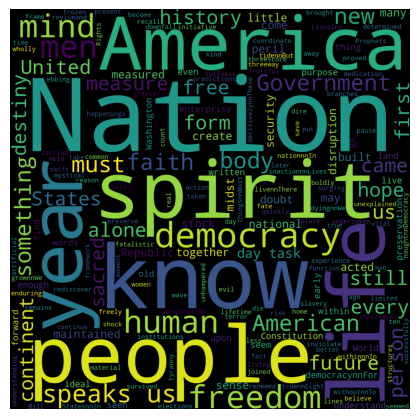

In [157]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(speech['Speech'][0]) 
  
# plot the WordCloud image                        
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Roosevelt_speech (after cleaning)!!")
plt.show()

Word Cloud for Kennedy_speech (after cleaning)!!


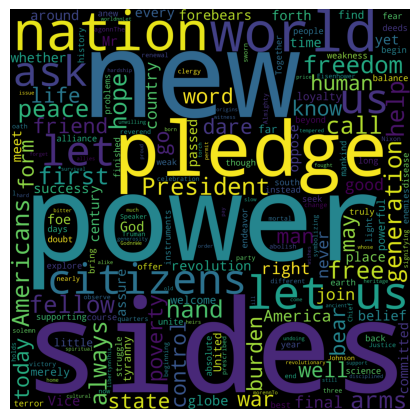

In [158]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(speech['Speech'][1]) 
  
# plot the WordCloud image                        
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Kennedy_speech (after cleaning)!!")
plt.show()

Word Cloud for Nixon_speech (after cleaning)!!


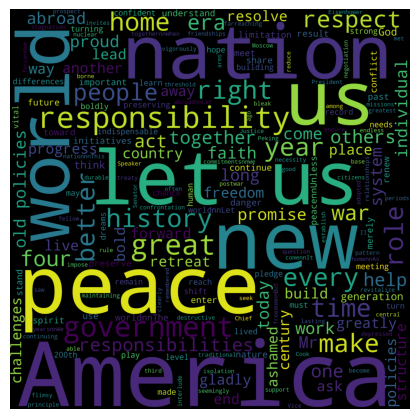

In [159]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(speech['Speech'][2]) 
  
# plot the WordCloud image                        
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Nixon_speech (after cleaning)!!")
plt.show()